# Previsão de preços de ações -- Support Vector Machine

### Importar pacotes e o dataset

In [21]:
! pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 475.8 kB/s eta 0:00:00
     -------------------------------------- 944.1/944.1 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 54.9/54.9 kB 102.2 kB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 2.3 MB/s eta 0:00:00


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
!pip install yfinance --upgrade --no-cache-dir

In [7]:
import yfinance as yf
yf.pdr_override()

In [8]:
codigo = ['PETR4.SA']
petro = yf.Ticker(codigo[0])

In [9]:
petro = petro.history(start='2012-01-01', end='2022-07-01')

In [10]:
petro.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-24,26.76,27.090000,26.18,26.290001,53413400,0.0,0
2022-06-27,26.82,28.070000,26.66,27.980000,90417700,0.0,0
2022-06-28,28.58,28.830000,28.02,28.330000,51388000,0.0,0
2022-06-29,28.48,28.820000,27.84,28.080000,52048800,0.0,0
2022-06-30,27.65,28.059999,27.40,27.930000,49910100,0.0,0


### Limpar dados

In [11]:
print(petro['Stock Splits'].unique())
petro['Dividends'].unique()

[0]


array([0.000000e+00, 1.773000e-01, 1.244000e-01, 2.000000e-01,
       3.861700e-01, 9.672000e-01, 5.000000e-02, 1.000000e-01,
       7.165630e-01, 1.949400e-02, 2.009250e-01, 4.219420e-01,
       4.490000e-04, 4.610000e-04, 7.928340e-01, 1.609911e+00,
       3.250487e+00, 2.970249e+00, 3.715490e+00])

In [12]:
petro.drop('Stock Splits',axis=1, inplace=True)

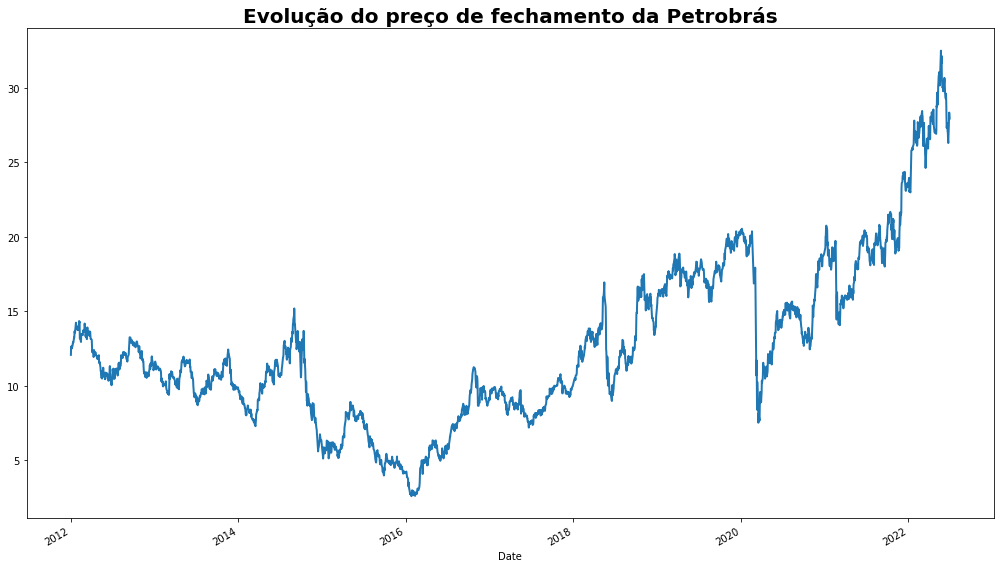

In [27]:
fig, ax = plt.subplots(figsize=(14, 8))
petro['Close'].plot(kind='line', ax=ax, linewidth=2)
ax.set_title('Evolução do preço de fechamento da Petrobrás', fontsize=20, fontweight='bold')
plt.tight_layout()

### Definir variável-alvo

In [28]:
petro['tomorrow'] = petro['Close'].shift(-1)

In [29]:
petro['target'] = (petro['tomorrow'] > petro['Close']).astype(int)

### Treino e teste

In [16]:
# conjunto de treinamento e de teste
train = petro.iloc[:-200]
test = petro.iloc[-200:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']

### Criar e treinar modelo

In [31]:
! pip install scikit-learn

In [39]:
# modelo SVC
from sklearn.svm import SVC
model = SVC(kernel='poly', C=1, degree=3)
model.fit(train[predictors], train['target'])

SVC(C=1, kernel='poly')

In [40]:
# métricas utilizadas
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [41]:
preds = pd.Series(preds, index=test.index)

In [42]:
# acurácia nos dados treinados
precision_score(test['target'], preds) * 100

52.5